# Метод прогонки

### Задача №9

#### Постановка задачи:

##### Найти решение краевой задачи для одномерного стационарного уравнения теплопроводности

$\dfrac{d}{dx}(k(x)\dfrac{du}{dx})-q(x)u = -f(x)$

$u(0) = 0; \,\,\, u(1) = 1$

\begin{equation*}
    \begin{cases}
      u(x_0-0)=u(x_0+0)\\
	    k(x_0-0)u_x(x_0-0)=k(x_0+0)u_x(x_0+0)
    \end{cases}
\end{equation*}

$x < x_0 = 1/\sqrt{3}; \,\,\, k(x) = 1; \,\,\, q(x) = x^2; \,\,\, f(x) = x^2 - 1;$

$x > x_0 = 1/\sqrt{3}; \,\,\, k(x) = e^{-x}; \,\,\, q(x) = x; \,\,\, f(x) = 1;$

Модельная задача:

$x_0 = 1/\sqrt{3}; \,\,\, k(x)=k(x_0); \,\,\, q(x)=q(x_0); \,\,\, f(x)=f(x_0)$

In [40]:
import numpy as np
import matplotlib.pyplot as plt

### Объявления переменных и функций

In [41]:
delta = 0.0001
x = np.arange(0, 1.0 + delta, delta)
x_0 = 1 / np.sqrt(3)

def k(x):
    if(x <= x_0):
        return 1
    return np.exp(-x)

def qq(x):
    if(x <= x_0):
        return x ** 2
    return x

def f(x):
    if(x <= x_0):
        return x ** 2 - 1
    return 1

def main_func():
    num_of_iter = int(1 / delta)
    left_num = int(x_0 / delta)
    right_num = left_num + 1
    a = np.zeros(num_of_iter + 1)
    b = np.zeros(num_of_iter + 1)
    c = np.zeros(num_of_iter + 1)
    d = np.zeros(num_of_iter + 1)
    u = np.zeros(num_of_iter + 1)
    p = np.zeros(num_of_iter + 1)
    q = np.zeros(num_of_iter + 1)
    u[0] = 0
    u[-1] = 1

    for i in range(1, num_of_iter):
        if i < left_num or i > right_num:
            a[i] = k((i - 1/2) * delta)
            b[i] = -(k((i + 1/2) * delta) + k((i - 1/2) * delta) + qq(i * delta) * (delta**2))
            c[i] = k((i + 1/2) * delta)
            d[i] = -f(i * delta) * (delta**2)

    p[1] = -c[1] / b[1]
    q[1] = (d[1] - a[1] * u[0]) / b[1]
    p[num_of_iter - 1] = -a[num_of_iter - 1] / b[num_of_iter - 1]
    q[num_of_iter - 1] = (d[num_of_iter - 1] - a[num_of_iter - 1] * u[num_of_iter]) / b[num_of_iter - 1]

    for i in range(2, left_num):
        p[i] = -c[i] / (b[i] + a[i] * p[i - 1])
        q[i] = (d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1])
    for i in range(num_of_iter - 2, right_num, -1):
        p[i] = -a[i] / (b[i] + c[i] * p[i + 1])
        q[i] = (d[i] - c[i] * q[i + 1]) / (b[i] + c[i] * p[i + 1])

    u[left_num] = k(left_num * delta) * q[left_num - 1] + k(right_num * delta) * q[right_num + 1] / (k(left_num * delta) * (1 - p[left_num - 1]) + k(right_num * delta) * (1 - p[right_num + 1]))
    u[right_num] = u[left_num]
    u[left_num - 1] = p[left_num - 1] * u[left_num] + q[left_num - 1]
    u[right_num + 1] = p[right_num + 1] * u[right_num] + q[right_num + 1]

    for i in range(left_num - 1, 0, -1):
    	u[i] = p[i] * u[i + 1] + q[i]
    for i in range(right_num + 1, num_of_iter):
        u[i] = p[i] * u[i - 1] + q[i]
    
    return u


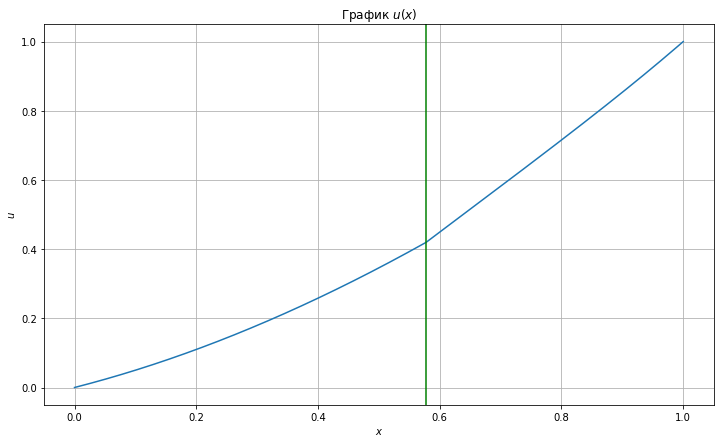

In [42]:
u = main_func()

fig = plt.figure(figsize=[12, 7])
plt.title("График $u(x)$")
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.grid()
plt.plot(x, u)
plt.axvline(x = x_0, color = 'green')
plt.show()